# Actividad N° 05: iFood

## Integrantes

**Grupo N° 03**

- Adriana Villalobos
- Gustavo Ledesma
- Alejo Cuello

## Descripción de la actividad

Trabajamos sobre el conjunto de datos *marketing-campaign.csv* de iFood. El objetivo de la actividad es validar los modelos de clasificación y regresión utilizados para predecir distintas variables.

# Consigna

- Creen un modelo de clasificación utilizando Random Forest para la columna `Response`.
- Guarden el modelo de clasificación Random forest como `rfc.pkl`.
- Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.
- Guardar ambos modelos de regresion en pkl `lr.pkl` y `rfr.pkl`
- Cargar proyecto en Github / Gitlab, usen git y git-lfs para los `.csv` y `.pkl`.

## Consideraciones

Repliquen este notebook para la resolución del ejercicio. Consideren las etapas:

1) Cargamos los datos

2) Preparación de la data

3) Clasificación

4) Regresión

5) Guardar un modelo.

**Podemos decidir:**
- Cómo preparar y acondicionar el dataset.
- Pueden agregar y eliminar columnas del dataset.
- Decidir parámetros para ajustar en los modelos de clasificación y regresión.

# Código

#### CARGA DE DATOS

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt

from funpymodeling.exploratory import status
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.metrics import RocCurveDisplay

In [67]:
data = pd.read_csv("marketing_campaign.csv", sep=';', index_col=0)
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [68]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Year_Birth,0,0.000000,0,0.000000,59,int64
1,Education,0,0.000000,0,0.000000,5,object
2,Marital_Status,0,0.000000,0,0.000000,8,object
3,Income,24,0.010714,0,0.000000,1974,float64
4,Kidhome,0,0.000000,1293,0.577232,3,int64
5,Teenhome,0,0.000000,1158,0.516964,3,int64
6,Dt_Customer,0,0.000000,0,0.000000,663,object
7,Recency,0,0.000000,28,0.012500,100,int64
8,MntWines,0,0.000000,13,0.005804,776,int64
9,MntFruits,0,0.000000,400,0.178571,158,int64


#### DESCARTE DE REGISTROS CON VARIABLE OBJETIVO NULA

In [69]:
discarded_data = data[data["Income"].isna()]
data = data[data["Income"].notna()]

#### CHEQUEO DE ALGUNAS VARIABLES

In [70]:
print("Casos raros en los que gastó más en productos gold que en la sumatoria de todas las categorías")
data[data["MntGoldProds"] > (data["MntFishProducts"] + data["MntMeatProducts"] + data["MntFruits"] + data["MntSweetProducts"] + data["MntWines"])][["MntGoldProds","MntFishProducts","MntMeatProducts","MntFruits","MntSweetProducts","MntWines"]]

Casos raros en los que gastó más en productos gold que en la sumatoria de todas las categorías


,MntGoldProds,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines
ID,,,,,,
4246,262,4,26,11,3,67
6237,291,5,33,4,2,81
10311,321,2,12,4,4,16


In [71]:
print("Chequeamos que la variable Response tenga aproximadamente un 15% de efectividad")
data["Response"].sum() / data.shape[0]

Chequeamos que la variable Response tenga aproximadamente un 15% de efectividad


0.15027075812274368

#### ELIMINAMOS COLUMNAS FECHA Y CON VALORES ÚNICOS

In [72]:
columnas_a_eliminar = ['Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
data = data.drop(columns=columnas_a_eliminar)

In [73]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Education,0,0.0,0,0.000000,5,object
1,Marital_Status,0,0.0,0,0.000000,8,object
2,Income,0,0.0,0,0.000000,1974,float64
3,Kidhome,0,0.0,1283,0.578971,3,int64
4,Teenhome,0,0.0,1147,0.517599,3,int64
5,Recency,0,0.0,28,0.012635,100,int64
6,MntWines,0,0.0,13,0.005866,776,int64
7,MntFruits,0,0.0,395,0.178249,158,int64
8,MntMeatProducts,0,0.0,1,0.000451,554,int64
9,MntFishProducts,0,0.0,379,0.171029,182,int64


#### TRANSFORMAMOS COLUMNAS OBJECT A NUMÉRICAS, YA QUE SON POCOS VALORES

In [74]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [75]:
class_map = {'Single':0, 'Married':1, 'Together':1, 'Divorced':2, 'Widow':3, 'Alone':0, 'Absurd':0, 'YOLO':0}
data['Marital_Status'] = data['Marital_Status'].map(class_map)

In [76]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [77]:
# Si tuvieramos el orden de la etapa más básica a la más especializada, podríamos ordenarlas
class_map = {'Graduation':0, 'PhD':1, 'Master':2, 'Basic':3, '2n Cycle':4}
data['Education'] = data['Education'].map(class_map)

In [78]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Education,0,0.0,1116,0.503610,5,int64
1,Marital_Status,0,0.0,478,0.215704,4,int64
2,Income,0,0.0,0,0.000000,1974,float64
3,Kidhome,0,0.0,1283,0.578971,3,int64
4,Teenhome,0,0.0,1147,0.517599,3,int64
5,Recency,0,0.0,28,0.012635,100,int64
6,MntWines,0,0.0,13,0.005866,776,int64
7,MntFruits,0,0.0,395,0.178249,158,int64
8,MntMeatProducts,0,0.0,1,0.000451,554,int64
9,MntFishProducts,0,0.0,379,0.171029,182,int64


## Clasificación
Variable target: Response

### Random Forest Classifier

In [79]:
x_data_classification = data.drop('Response', axis=1)
y_data_classification = data['Response']

x_data_classification = x_data_classification.values
y_data_classification = y_data_classification.values

x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(x_data_classification, y_data_classification, test_size=0.3, random_state=42)

In [80]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)

rfc.fit(x_train_classification, y_train_classification)
y_train_classification_pred = rfc.predict(x_train_classification)

In [81]:
pred_probs = rfc.predict_proba(x_train_classification)
pred_probs

array([[1.  , 0.  ],
       [0.4 , 0.6 ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.92, 0.08],
       [0.9 , 0.1 ]])

In [82]:
pred_probs

array([[1.  , 0.  ],
       [0.4 , 0.6 ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.92, 0.08],
       [0.9 , 0.1 ]])

In [83]:
y_probs_tr = pred_probs[: ,1]

In [84]:
y_probs_tr 

array([0.  , 0.6 , 0.01, ..., 0.01, 0.08, 0.1 ])

In [85]:
with open('rfc.pickle', 'wb') as handle:
    pickle.dump(rfc, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Matriz de Confusión

In [86]:
# atención, asume 0.5 como punto de corte
from sklearn.metrics import ConfusionMatrixDisplay

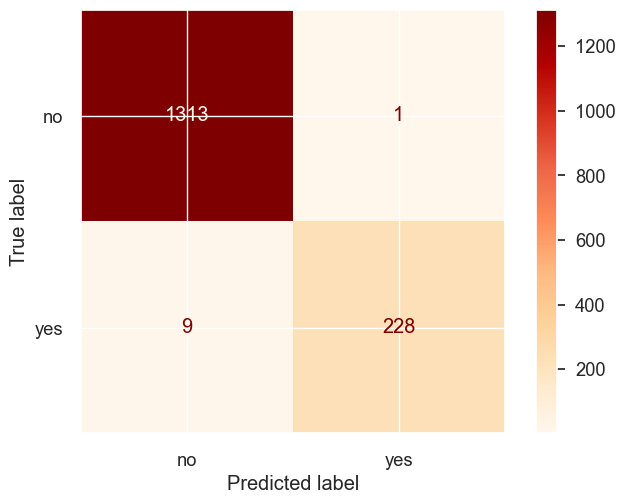

In [87]:
sns.set_theme(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rfc, x_train_classification, y_train_classification,
    display_labels=['no','yes'],
    cmap='OrRd',
    )

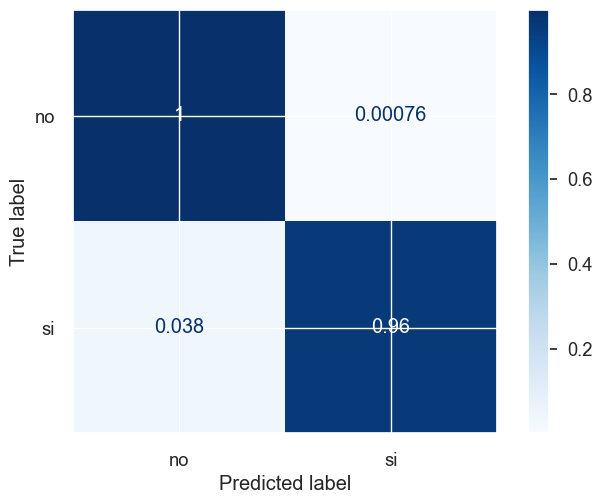

In [88]:
ConfusionMatrixDisplay.from_estimator(
    rfc, x_train_classification, y_train_classification,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

In [89]:
y_pred1=rfc.predict(x_train_classification)

conf_mat1=pd.crosstab(index=y_train_classification,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')

print(conf_mat1)

Pred           0         1
Actual                    
0       0.999239  0.000761
1       0.037975  0.962025


In [90]:
pd.crosstab(index=y_train_classification,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize= True)

Pred,0,1
Actual,,
0,0.846551,0.000645
1,0.005803,0.147002


### Variar el punto de corte

In [91]:
y_probs_tr.mean()


0.15387792054281418

In [92]:
y_preds2=np.where(y_probs_tr > 0.15, 1, 0)

In [93]:
conf_mat2=pd.crosstab(index=y_train_classification, 
                      columns=y_preds2,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

print(conf_mat2)

Pred           0         1
Actual                    
0       0.955099  0.044901
1       0.000000  1.000000


Comparo el antes y el después

In [94]:
print("### Matriz Predicciones corte 0.5 (default)")
print(conf_mat1)

print("-"*40)
print("### Matriz Predicciones corte 0.15 ")
print(conf_mat2)

### Matriz Predicciones corte 0.5 (default)
Pred           0         1
Actual                    
0       0.999239  0.000761
1       0.037975  0.962025
----------------------------------------
### Matriz Predicciones corte 0.15 
Pred           0         1
Actual                    
0       0.955099  0.044901
1       0.000000  1.000000


Con el corte en 0.5 tengo más presición con los negativos y menos con los positivos.</br>
Con el corte en 0.15 tengo más falsos negativos pero no tengo falsos positivos. </br>
Para este caso por tratarse de una campa´ña de marketing, es más útil que las predicciones de efectividad de ventas minimice los falsos positivos, ya que los falsos negativos no representan una pérdida sino una ganancia.

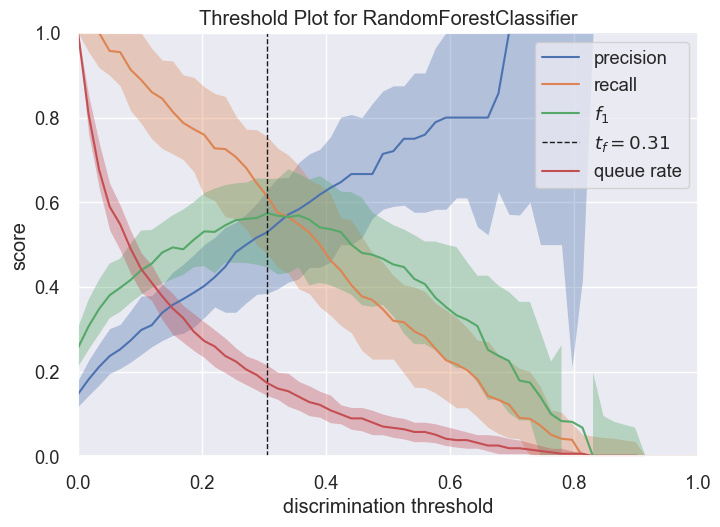

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [95]:
visualizer = DiscriminationThreshold(rfc)

visualizer.fit(x_train_classification, y_train_classification)        # Ajustar data al visualizador
visualizer.show()                       # Mostrar figura

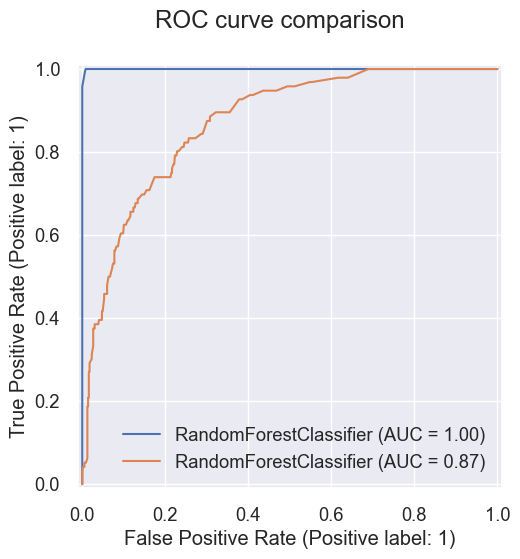

In [96]:
tr_disp = RocCurveDisplay.from_estimator(rfc, x_train_classification, y_train_classification)
ts_disp = RocCurveDisplay.from_estimator(rfc, x_test_classification, y_test_classification, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

## Regresión
Variable target: Income

### Regresión Lineal

In [97]:
x_data_reg = data.drop('Income', axis=1)
y_data_reg = data['Income']

x_data_reg = x_data_reg.values
y_data_reg = y_data_reg.values

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_data_reg, y_data_reg, test_size=0.3, random_state=42)

In [99]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [100]:
pred_tr = model.predict(x_train)
pred_ts = model.predict(x_test)

In [101]:

with open('lr.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)


### Random Forest Regressor

In [102]:
model_rf = RandomForestRegressor()

In [103]:
params = {
    # 'n_estimators' : [10, 100, 300, 500,1000],
    'n_estimators' : [10],
    'max_features': [50,100],
    #'bootstrap': [False, True],
    #'max_depth': [50, 500],
    #'min_samples_leaf': [3, 50],
    #'min_samples_split': [10, 50],
}

grid_rf = GridSearchCV(estimator = model_rf,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5, 
                        verbose = 1
                        )

In [104]:
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [50, 100], 'n_estimators': [10]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [105]:
grid_rf.best_estimator_

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,50
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [106]:
grid_rf.predict(x_train)
grid_rf.predict(x_test)

array([ 60433.8,  32906.3,  39295.5,  70412.8,  21761.3,  81956.1,
        78120. ,  62139.6,  51607.3,  82036.4,  57257.4,  35680.3,
        50365.6,  61132.9,  33548.6,  75930.9,  40262. ,  74819.9,
        40981.9,  86232.8,  53221.5,  58241.3,  31672. ,  35399.5,
        59177.1,  66865. ,  66882.8,  22817.9,  86137.1,  83672.5,
        23819.9,  74725.2,  33242.6,  35925.5,  28463. ,  50295.3,
        91096.3,  50302.3,  68700.9,  72608.4,  79442.1,  45092.8,
        82246.3,  50072.2,  57693.7,  42871.5,  46961.4,  33170. ,
        52320.4,  23025.7,  64804. ,  45480.2,  23405.3,  64505.3,
        65901. ,  75201.2,  76067.4,  64340.7,  37057.4,  37191.8,
        73571. ,  21812.3,  33110.8,  28026.2,  82838.7,  57596.6,
        55971.6,  73142.7,  68118.1,  48882.3, 105820.6,  55360.1,
        22229.2,  30552.5,  45421.4,  48232. ,  56421.6,  81334.4,
        78881.4,  56210.3,  77899.2,  70952.7,  93468.5,  70947.1,
        54102.7,  30567.9,  57710.7,  36601.5,  59070.4,  2938

In [107]:
grid_rf.best_params_

{'max_features': 50, 'n_estimators': 10}

In [108]:
X = data.drop('Income', axis=1)
y = data['Income']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [50, 100], 'n_estimators': [10]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [111]:
grid_rf.best_estimator_

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,50
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [112]:
grid_rf.predict(x_train)
grid_rf.predict(x_test)

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([ 57220.8,  32805.2,  34073. ,  73933.1,  16895. ,  83735.6,
        78879.5,  60228.9,  47510.7,  79905.2,  55847.5,  33699.5,
        52034. ,  59665.5,  35329.3,  70459.5,  40714.8,  77777.7,
        36454.3,  86659.8,  52998.4,  55823.8,  28115.7,  36507.4,
        56609.2,  78484.9,  66900. ,  19137. ,  87213.1,  80123.7,
        28079.8,  79641.6,  32378.1,  38751.9,  23287.4,  49468. ,
        93069.3,  44307. ,  67396.1,  70092.8,  78399.2,  45089.3,
        83110. ,  58178.3,  48839.5,  50239.8,  48135.9,  25178.5,
        48907.1,  23924.1,  65644.1,  48970.9,  23162. ,  65991.6,
        62749.8,  75127. ,  79492.2,  64349.8,  31698.7,  33796.7,
        74365.4,  16993.3,  31256.1,  35971.6,  83618.5,  60109.7,
        57242.3,  75409.5,  76195.5,  48858.4,  81926.6,  57349.5,
        22193.7,  30910.5,  42398.8, 107540.2,  57363.4,  78946.7,
        11975.9,  59602.7,  80313.5,  71626.9, 110377.8,  68983.2,
        58027. ,  25255.8,  56882.7,  34573.7,  64858.1,  3513

In [113]:
grid_rf.best_params_

{'max_features': 50, 'n_estimators': 10}

#### Combinatoria de parámetros

In [114]:
pd.concat([pd.DataFrame(grid_rf.cv_results_["params"]),
           pd.DataFrame(grid_rf.cv_results_["mean_test_score"], 
                        columns=["neg_mean_absolute_error"])],axis=1).sort_values('neg_mean_absolute_error', ascending=False)

,max_features,n_estimators,neg_mean_absolute_error
0,50,10,-6748.327082
1,100,10,-6856.560560


In [115]:
grid_rf.score(X_train, y_train)

-2731.5293453724603

In [116]:
grid_rf.score(X_test, y_test)

-6309.056981981981

In [117]:
# Guardar el modelo
with open('rfr.pickle', 'wb') as handle:
    pickle.dump(grid_rf.best_estimator_, handle, protocol=pickle.HIGHEST_PROTOCOL)
